In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style, pyplot as plt, axes as ax
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from keras.models import Sequential
from keras.layers import Dense, LSTM
style.use('seaborn-darkgrid')

## Dataset Description

In [4]:
df = pd.read_csv("C:/Users/user/Downloads/forex.csv/forex.csv")
df.head()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [5]:
df.shape

(1453035, 7)

In [6]:
df.dtypes

slug         object
date         object
open        float64
high        float64
low         float64
close       float64
currency     object
dtype: object

In [7]:
df.isnull().sum()

slug        0
date        0
open        0
high        0
low         0
close       0
currency    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453035 entries, 0 to 1453034
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   slug      1453035 non-null  object 
 1   date      1453035 non-null  object 
 2   open      1453035 non-null  float64
 3   high      1453035 non-null  float64
 4   low       1453035 non-null  float64
 5   close     1453035 non-null  float64
 6   currency  1453035 non-null  object 
dtypes: float64(4), object(3)
memory usage: 77.6+ MB


In [9]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,open,high,low,close
count,1453035.00000,1453035.00000,1453035.00000,1453035.00000
mean,629.11048,633.43504,625.97811,629.56039
std,9563.68630,9577.63627,9560.17599,9565.75456
min,0.00100,0.00402,0.00100,0.00400
25%,1.73270,1.74210,1.72500,1.73240
50%,7.88490,7.91210,7.85770,7.88610
75%,64.29065,64.68050,63.93406,64.22150
max,2760430.75000,2760430.75000,2760430.75000,2760430.75000


In [10]:
slug = df.iloc[:,0]
res = np.unique(slug)
res

array(['AUD/ARS', 'AUD/BRL', 'AUD/CAD', 'AUD/CHF', 'AUD/CNY', 'AUD/CZK',
       'AUD/DKK', 'AUD/EUR', 'AUD/FJD', 'AUD/GBP', 'AUD/HKD', 'AUD/HUF',
       'AUD/IDR', 'AUD/ILS', 'AUD/JPY', 'AUD/KRW', 'AUD/MXN', 'AUD/MYR',
       'AUD/NOK', 'AUD/PKR', 'AUD/PLN', 'AUD/SEK', 'AUD/SGD', 'AUD/THB',
       'AUD/TWD', 'AUD/USD', 'AUD/ZAR', 'CHF/AED', 'CHF/AUD', 'CHF/BRL',
       'CHF/BWP', 'CHF/CAD', 'CHF/CNY', 'CHF/CZK', 'CHF/DKK', 'CHF/EUR',
       'CHF/GBP', 'CHF/HKD', 'CHF/HUF', 'CHF/IDR', 'CHF/ILS', 'CHF/INR',
       'CHF/JPY', 'CHF/MXN', 'CHF/MYR', 'CHF/NOK', 'CHF/NZD', 'CHF/PLN',
       'CHF/SEK', 'CHF/SGD', 'CHF/SZL', 'CHF/THB', 'CHF/TRY', 'CHF/USD',
       'CHF/ZAR', 'EUR/AED', 'EUR/ANG', 'EUR/ARS', 'EUR/AUD', 'EUR/BAM',
       'EUR/BGN', 'EUR/BMD', 'EUR/BND', 'EUR/BOB', 'EUR/BRL', 'EUR/BSD',
       'EUR/BWP', 'EUR/CAD', 'EUR/CHF', 'EUR/CLP', 'EUR/CNY', 'EUR/COP',
       'EUR/CRC', 'EUR/CZK', 'EUR/DKK', 'EUR/ETB', 'EUR/FJD', 'EUR/GBP',
       'EUR/GHS', 'EUR/HKD', 'EUR/HNL', 'EUR/HUF', 

In [11]:
df.corr()

,open,high,low,close
open,1.000000,0.998994,0.999967,0.999768
high,0.998994,1.000000,0.998958,0.998783
low,0.999967,0.998958,1.000000,0.999763
close,0.999768,0.998783,0.999763,1.000000


<AxesSubplot:>

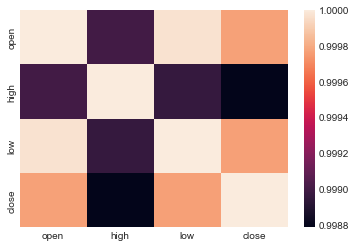

In [12]:
sns.heatmap(df.corr())

## Dataset Visualization

### Plot function for a single slug

In [13]:
def slug_plot(slug):
    plt.figure(figsize=(15, 8))
    plt.plot(df[df.slug==slug].close,'g',  linewidth=1.1,label=slug+' Close')
    plt.title(slug)
    plt.legend()
    plt.show()

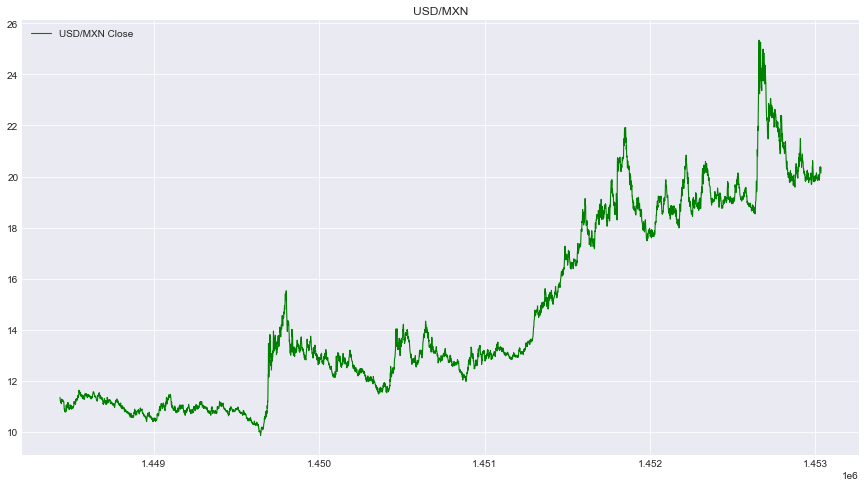

In [14]:
slug_plot('USD/MXN')

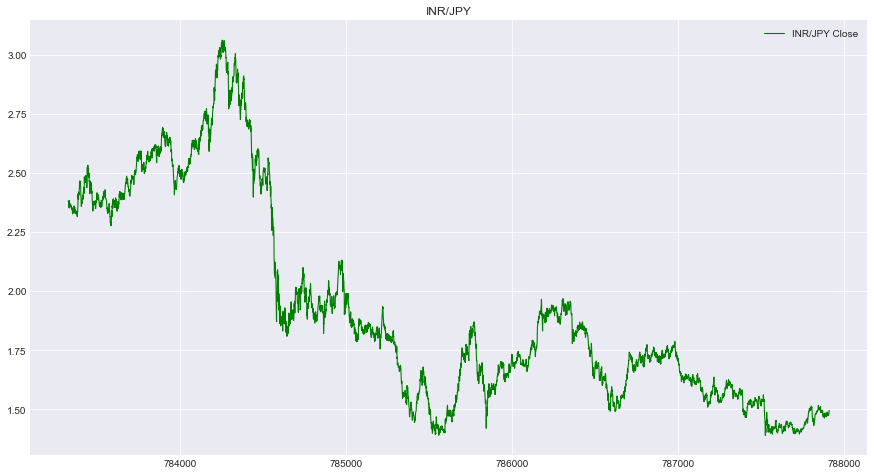

In [15]:
slug_plot("INR/JPY")

### Plotting every slug for a specified currency

In [16]:
def country_plot(temp_df):
    for Cur2 in temp_df['currency'].unique():
        plt.figure(figsize=(18,6))
        df_temp = temp_df[temp_df['currency'] == Cur2]
        plt.scatter(df_temp['date'], df_temp['close'])
        plt.title("1 " + Cur1 + " = x " + Cur2, fontsize = 20)
        plt.xlabel("Date", fontsize = 14, fontweight='bold')
        plt.ylabel('Closing Value', fontsize = 14, fontweight='bold')
        plt.show()

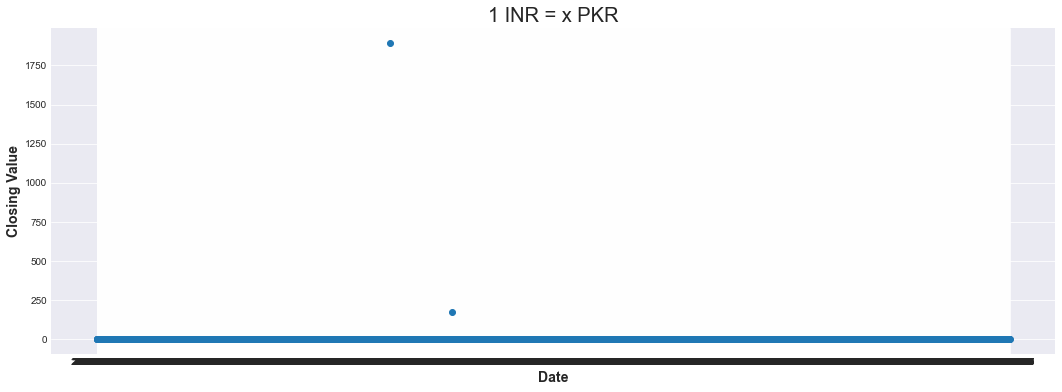

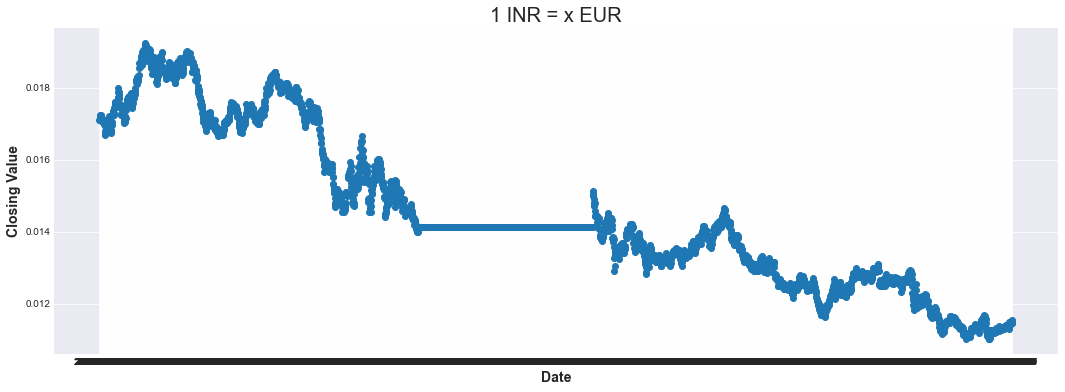

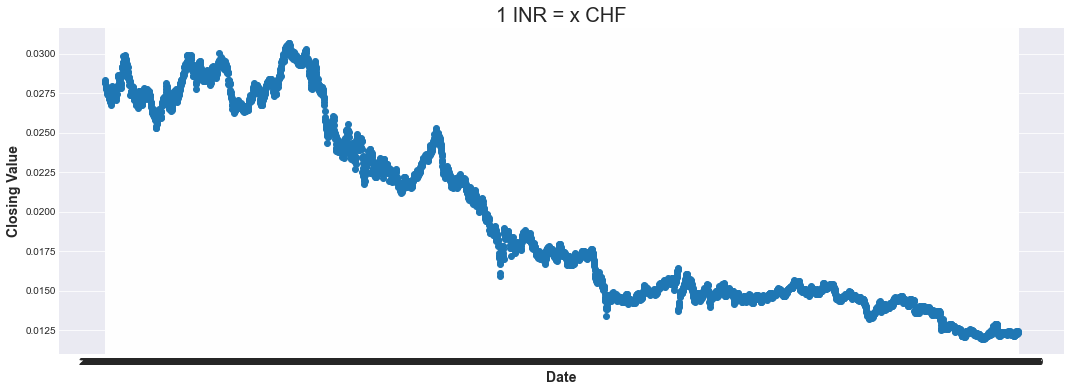

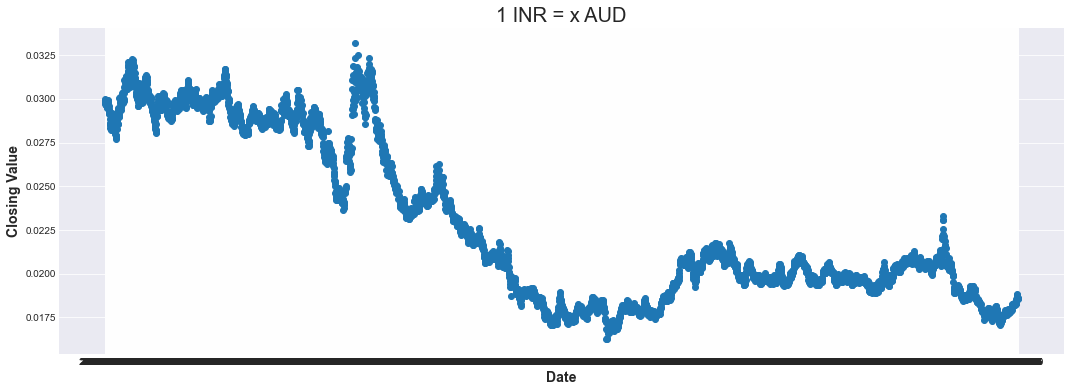

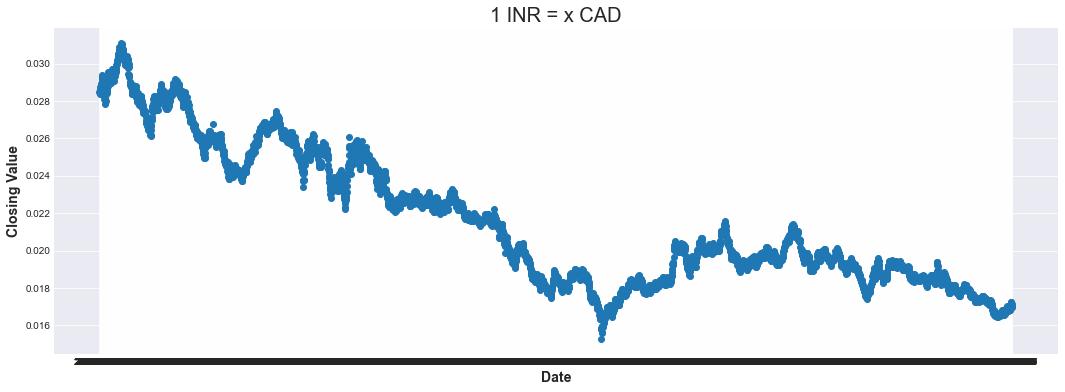

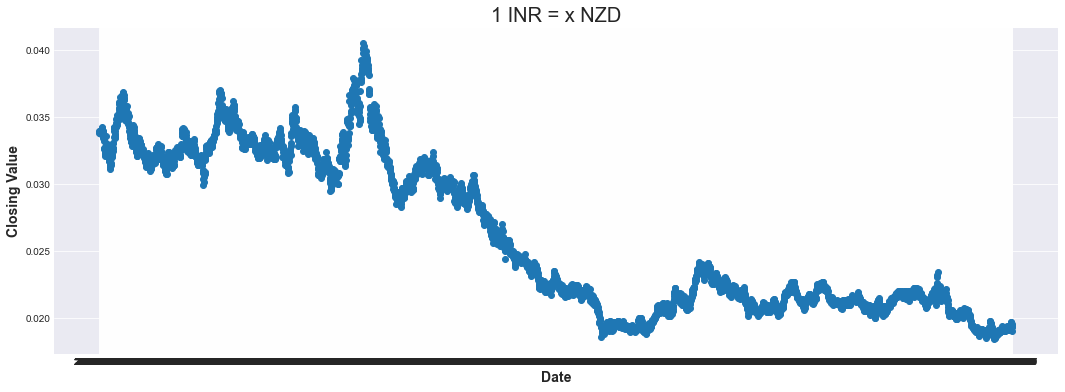

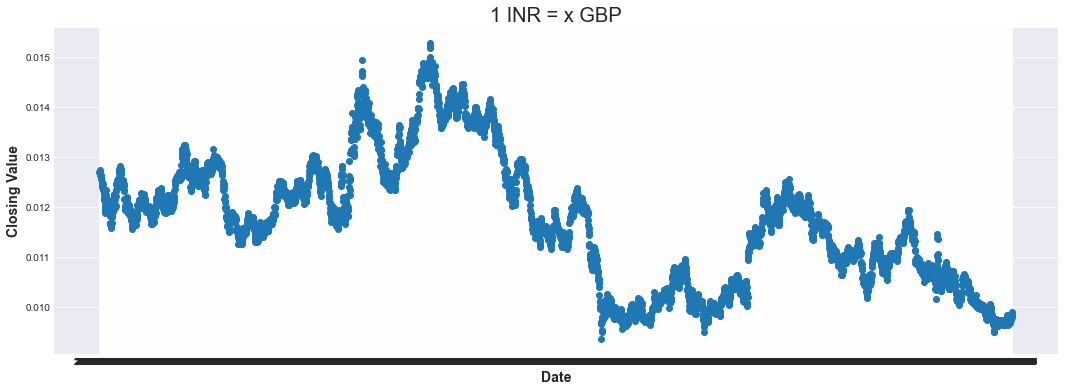

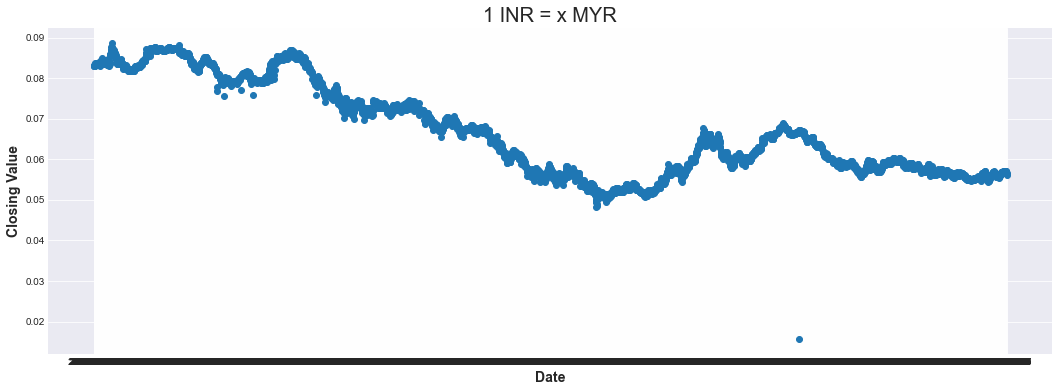

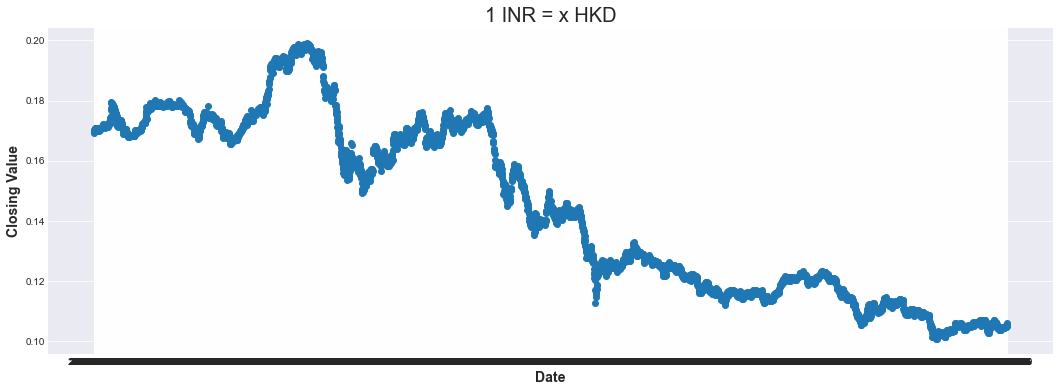

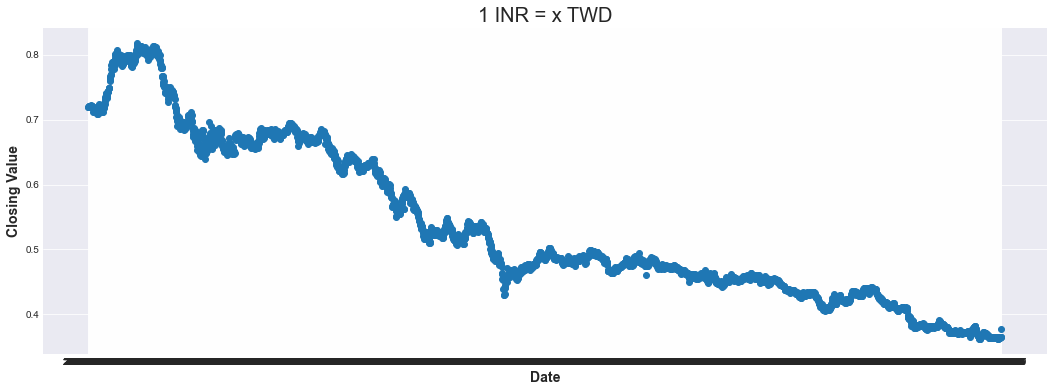

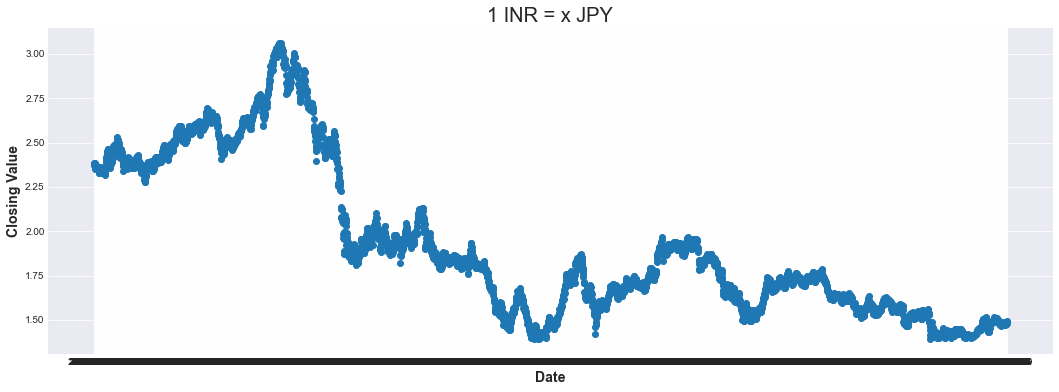

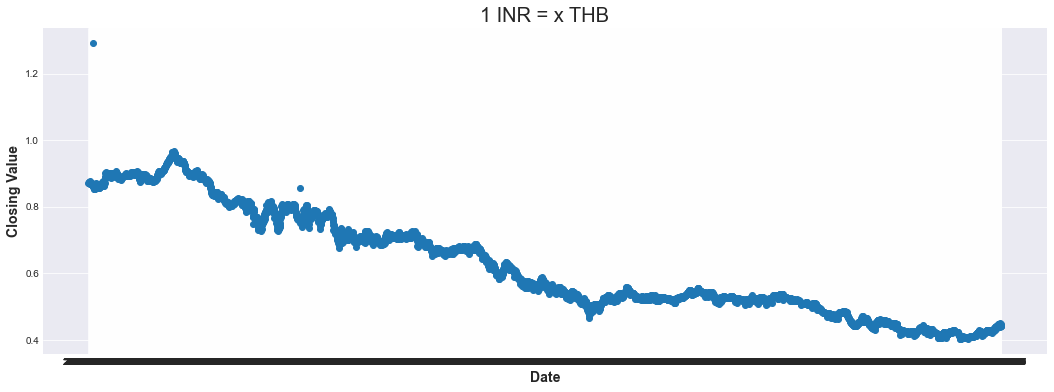

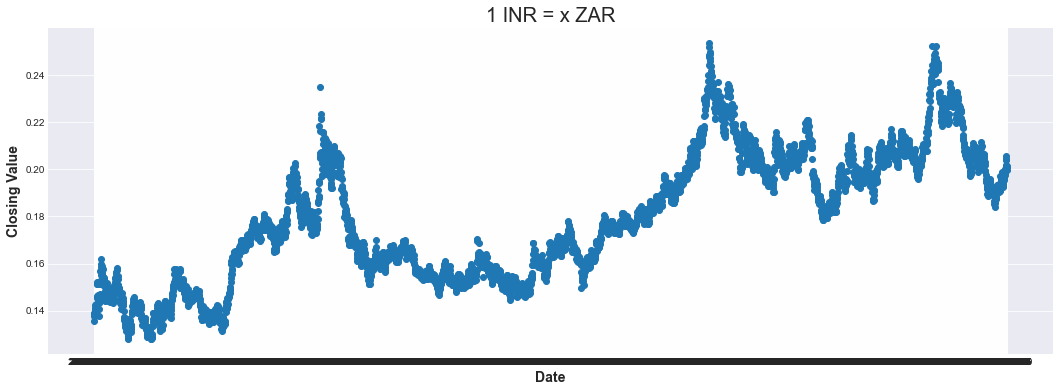

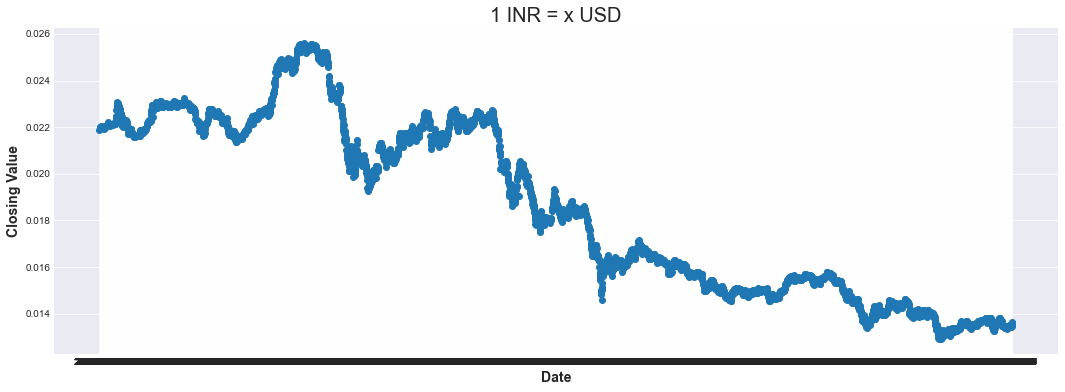

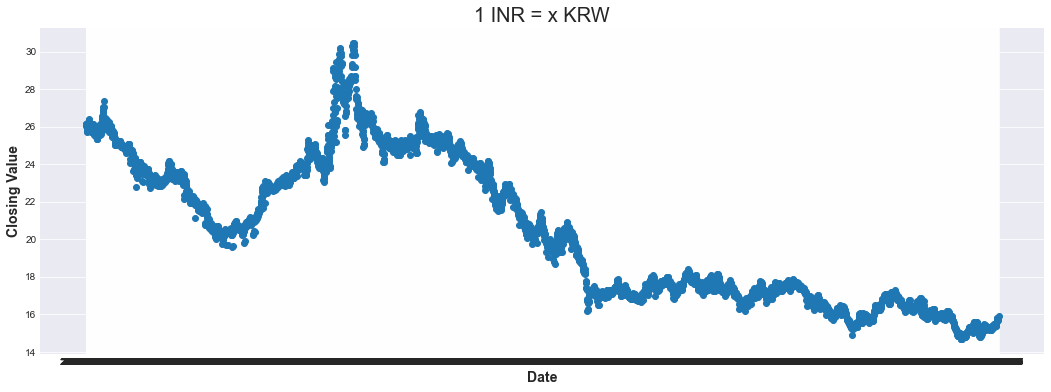

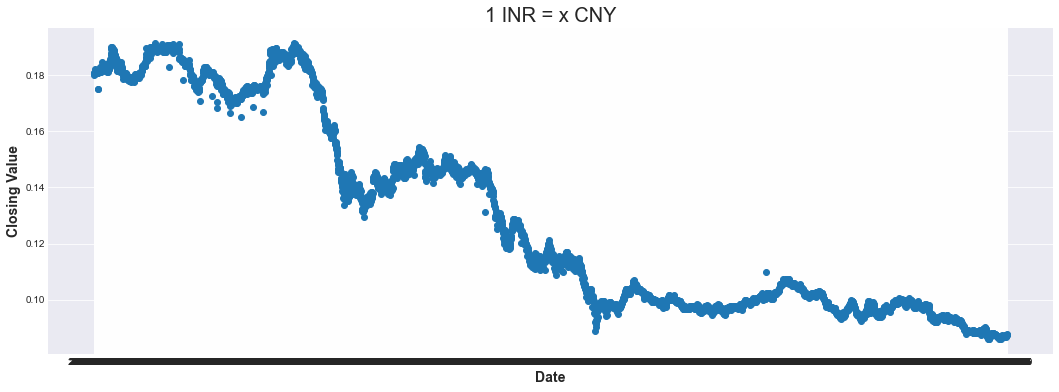

In [17]:
Cur1 = 'INR'
temp_df = df[df['slug'].str.contains(Cur1 + '/')]
country_plot(temp_df)

### Plotting a consolidated graph for a country

In [18]:
def country_plot_consolidates(country_coin_name, country_name):
    plt.figure(figsize=(15, 8))        
    plt.title(country_name)
    country_df = df[df.currency==country_coin_name]
    for slug in country_df.slug.unique():
        if country_df[country_df.slug==slug].close.mean() > 0.5:
            plt.plot(country_df[country_df.slug==slug].date, country_df[country_df.slug==slug].close, linewidth=1.2, label=slug)
        else:
            plt.plot(country_df[country_df.slug==slug].date,country_df[country_df.slug==slug].close*100, linewidth=1.2, label=(slug+' *10^2'))

    plt.legend()
    plt.show()


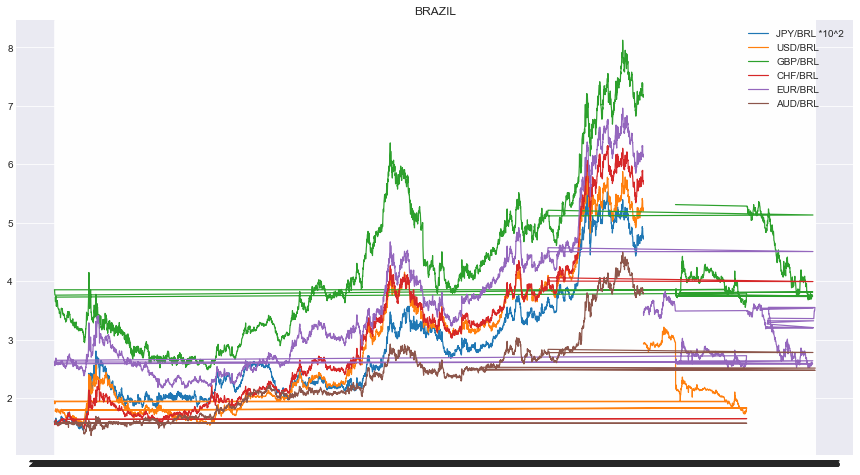

In [19]:
country_plot_consolidates('BRL', 'BRAZIL')

In [20]:
def variation_plot(country_coin_name):
    country_df = df[df.currency==country_coin_name]
    for slug in country_df.slug.unique():
        plt.figure(figsize=(10,5))
        plt.title(slug)
        plt.plot(country_df[country_df.slug==slug].date,(country_df[country_df.slug==slug].close/country_df[country_df.slug==slug].close.shift(1))-1, linewidth=0.8)
    plt.show()

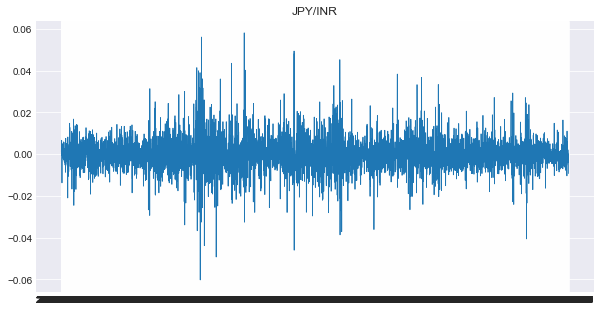

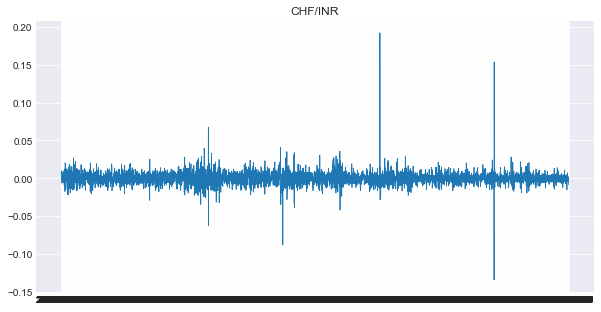

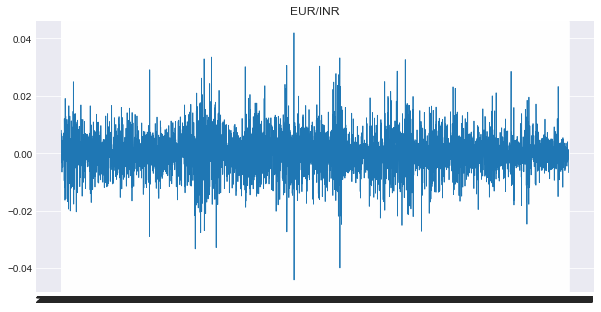

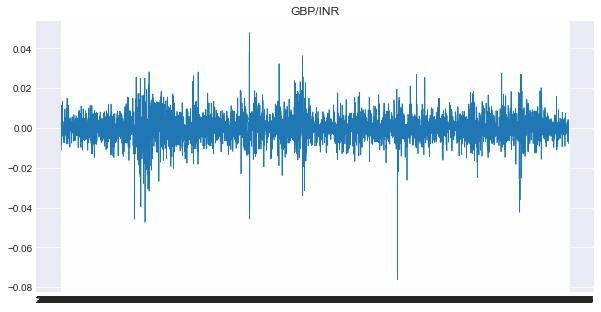

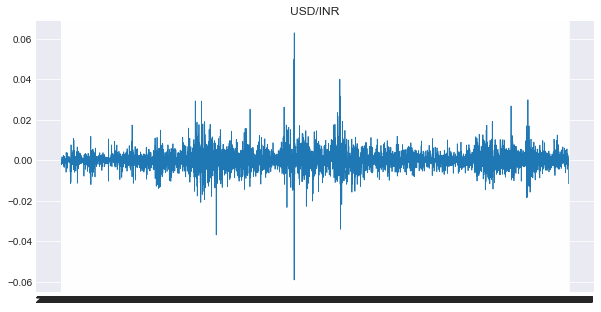

In [21]:
variation_plot('INR')

## Preprocessing Dataset

In [22]:
df[['cur1', 'cur2']] = df['slug'].str.split('/', 1, expand=True)

In [23]:
df.head()

,slug,date,open,high,low,close,currency,cur1,cur2
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,GBP,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,GBP,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,GBP,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,GBP,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,GBP,EGP


In [24]:
df.cur1.unique()

array(['GBP', 'EUR', 'AUD', 'JPY', 'CHF', 'USD', 'INR'], dtype=object)

In [25]:
df.cur2.unique()

array(['EGP', 'SCR', 'NOK', 'SZL', 'MYR', 'PKR', 'NZD', 'CUP', 'CAD',
       'CHF', 'ZMW', 'FJD', 'XOF', 'IDR', 'JPY', 'UAH', 'TWD', 'MMK',
       'BRL', 'CNY', 'HUF', 'MXN', 'BMD', 'KWD', 'BBD', 'TTD', 'SEK',
       'BWP', 'HNL', 'CZK', 'ISK', 'LKR', 'USD', 'RON', 'EUR', 'TND',
       'ZAR', 'SGD', 'BYN', 'PEN', 'XPF', 'THB', 'GBP', 'KRW', 'AUD',
       'MOP', 'PGK', 'PHP', 'BSD', 'CRC', 'JOD', 'MZN', 'TRY', 'BGN',
       'DJF', 'COP', 'INR', 'BAM', 'PLN', 'SAR', 'ARS', 'IRR', 'NIO',
       'MWK', 'LBP', 'IQD', 'KES', 'UGX', 'KZT', 'NGN', 'GTQ', 'PYG',
       'ETB', 'SVC', 'VND', 'BND', 'MAD', 'KYD', 'ILS', 'MKD', 'HKD',
       'RUB', 'AED', 'GMD', 'BZD', 'SLL', 'MVR', 'DKK', 'MUR', 'JMD',
       'OMR', 'DZD', 'BOB', 'GHS', 'RSD', 'TZS', 'UZS', 'BDT', 'CLP',
       'MGA', 'QAR', 'ANG', 'HTG', 'BHD', 'ALL', 'BIF', 'SOS', 'MDL',
       'PAB', 'XAF', 'SDG', 'DOP', 'UYU'], dtype=object)

In [26]:
cur11 = { 'EGP':0, 'SCR':1, 'NOK':2, 'SZL':3, 'MYR':4, 'PKR':5, 'NZD':6, 'CUP':7, 'CAD':8,
       'CHF':9, 'ZMW':10, 'FJD':11, 'XOF':12, 'IDR':13, 'JPY':14, 'UAH':15, 'TWD':16, 'MMK':17,
       'BRL':18, 'CNY':19, 'HUF':20, 'MXN':21, 'BMD':22, 'KWD':23, 'BBD':24, 'TTD':25, 'SEK':26,
       'BWP':27, 'HNL':28, 'CZK':29, 'ISK':30, 'LKR':31, 'USD':32, 'RON':33, 'EUR':34, 'TND':35,
       'ZAR':36, 'SGD':37, 'BYN':38, 'PEN':39, 'XPF':40, 'THB':41, 'GBP':42, 'KRW':43, 'AUD':44,
       'MOP':45, 'PGK':46, 'PHP':47, 'BSD':48, 'CRC':49, 'JOD':50, 'MZN':51, 'TRY':52, 'BGN':53,
       'DJF':54, 'COP':55, 'INR':56, 'BAM':57, 'PLN':58, 'SAR':59, 'ARS':60, 'IRR':61, 'NIO':62,
       'MWK':63, 'LBP':64, 'IQD':65, 'KES':66, 'UGX':67, 'KZT':68, 'NGN':69, 'GTQ':70, 'PYG':71,
       'ETB':72, 'SVC':73, 'VND':74, 'BND':75, 'MAD':76, 'KYD':77, 'ILS':78, 'MKD':79, 'HKD':80,
       'RUB':81, 'AED':82, 'GMD':83, 'BZD':84, 'SLL':85, 'MVR':86, 'DKK':88, 'MUR':89, 'JMD':90,
       'OMR':91, 'DZD':92, 'BOB':93, 'GHS':94, 'RSD':95, 'TZS':96, 'UZS':97, 'BDT':98, 'CLP':99,
       'MGA':100, 'QAR':101, 'ANG':102, 'HTG':103, 'BHD':104, 'ALL':105, 'BIF':106, 'SOS':107, 'MDL':108,
       'PAB':109, 'XAF':110, 'SDG':111, 'DOP':112, 'UYU':113
}

df = df.replace({'cur1': cur11})
df = df.replace({'cur2': cur11})
df.head()

,slug,date,open,high,low,close,currency,cur1,cur2
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,42,0
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,42,0
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,42,0
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,42,0
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,42,0


In [27]:
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

In [28]:
df.head()

,slug,date,open,high,low,close,currency,cur1,cur2
0,GBP/EGP,730585,5.58090,5.5947,5.5947,5.5947,EGP,42,0
1,GBP/EGP,730640,5.47517,5.4939,5.4939,5.4939,EGP,42,0
2,GBP/EGP,730698,5.67990,5.6543,5.6543,5.6543,EGP,42,0
3,GBP/EGP,731060,7.21700,7.2170,7.2170,7.2170,EGP,42,0
4,GBP/EGP,731217,7.42429,7.3899,7.3899,7.3899,EGP,42,0


In [29]:
slug11='USD/CNY'
dt3 = df[df.slug==slug11]

In [30]:
X = dt3.iloc[:, 1]
Y = dt3.iloc[:, 5]
X = np.array(X)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=38)
X_train1= X.reshape(-1,1)
y_train1= Y.reshape(-1,1)
X_test1= X.reshape(-1,1)
y_test1= Y.reshape(-1,1)

In [31]:
X_train

array([735494, 736773, 733755, ..., 737202, 736832, 736502], dtype=int64)

In [32]:
y_train

array([6.129 , 6.3316, 6.8193, ..., 6.9054, 6.3662, 6.8283])

In [33]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
sc_X1 = StandardScaler()
sc_Y1 = StandardScaler()
X_train1 = sc_X.fit_transform(X_train1)
y_train1 = sc_Y.fit_transform(y_train1)
X_test1 = sc_X1.fit_transform(X_test1)
y_test1 = sc_Y1.fit_transform(y_test1)


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


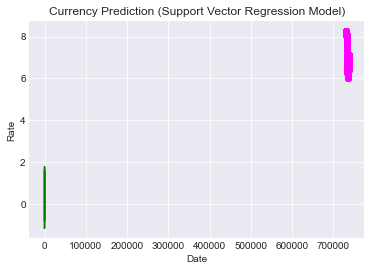




 Accuracy Score:  0.9650529970683811


In [34]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train1,y_train1)
y_pred = regressor.predict(X_test1)
plt.scatter(X_test, y_test, color = 'magenta')
plt.plot(X_test1, regressor.predict(X_test1), color = 'green')
plt.title('Currency Prediction (Support Vector Regression Model)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()
print("\n\n\n Accuracy Score: ", regressor.score(X_test1, y_test1))

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


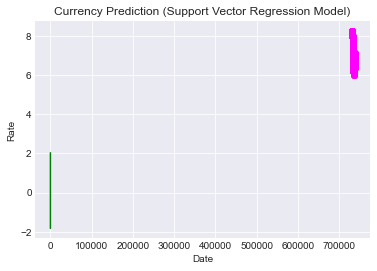




 Accuracy Score:  0.40872863814613225


In [35]:
regressor = SVR(kernel='poly')
regressor.fit(X_train1,y_train1)
y_pred = regressor.predict(X_test1)
plt.scatter(X_test, y_test, color = 'magenta')
plt.plot(X_test1, regressor.predict(X_test1), color = 'green')
plt.title('Currency Prediction (Support Vector Regression Model)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()
print("\n\n\n Accuracy Score: ", regressor.score(X_test1, y_test1))

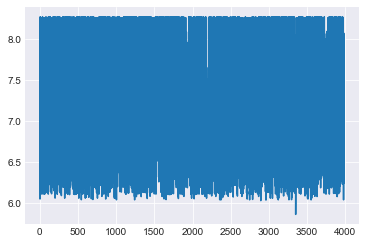

In [36]:
plt.plot(y_train)

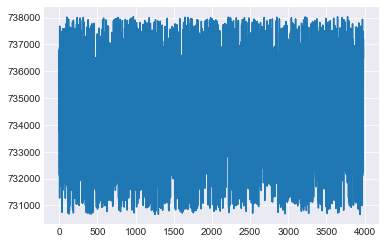

In [37]:
plt.plot(X_train)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [53]:
X_test = X_test.reshape(1, -1)

In [56]:
rf.fit(X_train1, y_train1)

C:\Users\user\AppData\Local\Temp\ipykernel_12060\916219740.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train1, y_train1)


RandomForestRegressor(random_state=42)

In [62]:
y_pred = rf.predict(X_test1)
y_pred

array([ 1.70396112,  1.70396112,  1.70411799, ..., -0.73357292,
       -0.72821779, -0.73898079])

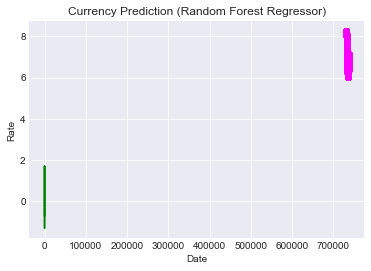




 Accuracy Score:  0.9999479625589174


In [66]:
plt.scatter(X_test, y_test, color = 'magenta')
plt.plot(X_test1, rf.predict(X_test1), color = 'green')
plt.title('Currency Prediction (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()
print("\n\n\n Accuracy Score: ", rf.score(X_test1, y_test1))